# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

## Dataset Collecting

### Dependecies

In [1]:
!pip install networkx[default]
!pip install kaggle tmdbv3api ipycytoscape pyvis py2cytoscape

In [2]:
TMDB_API_KEY="6d8adb7c9b743b7e1c715f489587f239"
TMDB_LANGUAGE="en"

#### Imports

In [3]:
import json
import requests
import pandas as pd
import seaborn as sns
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tmdbv3api import TMDb, Movie

### Download Dataset

In [4]:
api_token = {"username":"","key":""}
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [5]:
base_url: str = "https://news.ycombinator.com/"

In [6]:
def collect_data(url):
  page_content = requests.get(url).text
  beautiful_soup=BeautifulSoup(page_content, "html.parser")
  all_table_rows = beautiful_soup.find_all('tr', {"class": "athing"})

  parsed_entries=[]
  for table_row in all_table_rows:

    entry_id = table_row.attrs["id"]
    entry_title=table_row.find("span",{"class": "titleline"}).find('a').text
    entry_score_raw = beautiful_soup.find("span", {"id": f"score_{entry_id}"})
    entry_score = 0 if entry_score_raw is None else entry_score_raw.text.split(" ")[0]
    parsed_entry=(entry_id,entry_title,entry_score)

    parsed_entries.append(parsed_entry)

  return pd.DataFrame(parsed_entries, columns=["id", "title", "votes"])

In [7]:
collect_data(base_url).head()

,id,title,votes
0,43614285,Show HN: Lux – a luxurious package manager for...,21
1,43613194,Show HN: Browser MCP – Automate your browser u...,126
2,43614199,Fifty Years of Open Source Software Supply Cha...,17
3,43612102,Decoding the 90s: Cryptography in Early Softwa...,72
4,43613180,Variable duty cycle square waves with the Web ...,26


**Question 2**:  Write a function that collects data on four Marvel movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [8]:
COLUMN_NAMES=["name", "overview", "average score"]

def collect_marvel_movies():
  search = Movie().search("Marvel")
  search = sorted(search, key=lambda m: m['popularity'], reverse=True)
  movies=[(movie.title, movie.overview, movie.vote_average) for movie in search[:4]]
  return pd.DataFrame(movies, columns=COLUMN_NAMES)

In [9]:
tmdb = TMDb()
tmdb.api_key = TMDB_API_KEY
tmdb.language = TMDB_LANGUAGE
collect_marvel_movies()

,name,overview,average score
0,Chuck Billy and The Marvelous Guava Tree,Chuck Billy has spent his life picking guavas ...,7.792
1,The Marvels,"Carol Danvers, aka Captain Marvel, has reclaim...",6.013
2,LEGO Marvel Avengers: Mission Demolition,"A young, aspiring hero and superhero fan inadv...",6.753
3,LEGO Marvel Avengers: Code Red,The Avengers gather to celebrate their latest ...,6.504


## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

**Note:** Use ks-projects-201801.csv data

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [10]:
# which question to answer - put your ID number and run the code
your_id  = ""
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 1 and 4


In [11]:
!kaggle datasets download -d kemical/kickstarter-projects
!unzip -o ./kickstarter-projects.zip

Dataset URL: https://www.kaggle.com/datasets/kemical/kickstarter-projects
License(s): CC-BY-NC-SA-4.0
kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./kickstarter-projects.zip
  inflating: ks-projects-201612.csv  
  inflating: ks-projects-201801.csv  


In [12]:
ks_project = pd.read_csv("ks-projects-201801.csv", encoding="ISO-8859-1")

**Question 1:** On average which project category received the lowest number of backers? (15 pt)

In [13]:
average_backers_by_category = ks_project.groupby('category')['backers'].mean()

lowest_average_backers_category = average_backers_by_category.idxmin()

print(f"The project category with the lowest average number of backers is: {lowest_average_backers_category}")


The project category with the lowest average number of backers is: Crochet


**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

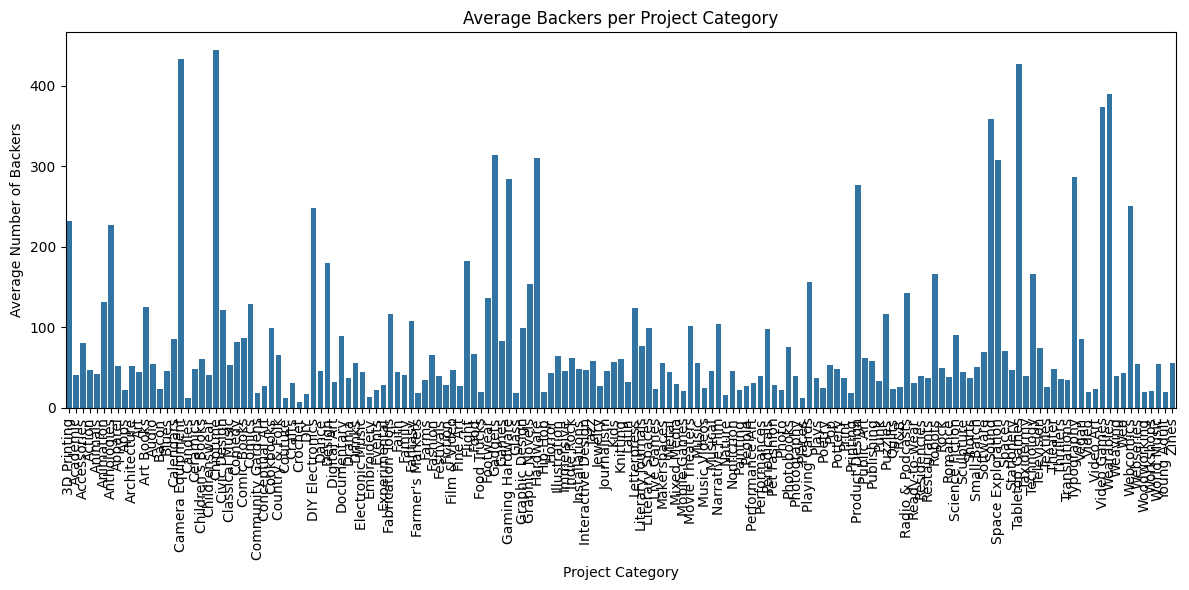

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_backers_by_category.index, y=average_backers_by_category.values)
plt.xlabel("Project Category")
plt.ylabel("Average Number of Backers")
plt.title("Average Backers per Project Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  **Pandas**, please answer the following questions:

In [15]:
!kaggle datasets download -d csanhueza/the-marvel-universe-social-network
!unzip -o ./the-marvel-universe-social-network.zip

Dataset URL: https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network
License(s): Attribution 3.0 Unported (CC BY 3.0)
the-marvel-universe-social-network.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./the-marvel-universe-social-network.zip
  inflating: edges.csv               
  inflating: hero-network.csv        
  inflating: nodes.csv               


In [16]:
hero_net = pd.read_csv("hero-network.csv", encoding="ISO-8859-1")
nodes = pd.read_csv("nodes.csv")

**Question 1:** Write code which calculate the top-20 most friendly characters, i.e., characters with the
    highest number of friends. Please use _hero_network.csv_ file (15pt).
    
**Note:** Not all the links in this dataset are symmetric.

In [17]:
hero_network_rev=hero_net.copy()
hero_network_rev.rename(columns={"hero1": "hero2", "hero2": "hero1"})

combined_hero_network = pd.concat([hero_net, hero_network_rev]).drop_duplicates()

all_most_friendly_characters = combined_hero_network.groupby("hero1").count().sort_values('hero2', ascending=False)
top_20=all_most_friendly_characters.head(20)

print(f"The top 20 most friendly characters are:\n {top_20}")

The top 20 most friendly characters are:
                       hero2
hero1                      
CAPTAIN AMERICA        1426
SPIDER-MAN/PETER PAR   1286
IRON MAN/TONY STARK    1132
WOLVERINE/LOGAN        1036
SCARLET WITCH/WANDA    1004
THING/BENJAMIN J. GR   1003
HUMAN TORCH/JOHNNY S    962
MR. FANTASTIC/REED R    957
THOR/DR. DONALD BLAK    947
VISION                  919
INVISIBLE WOMAN/SUE     919
BEAST/HENRY &HANK& P    918
HAWK                    880
CYCLOPS/SCOTT SUMMER    812
HULK/DR. ROBERT BRUC    802
WASP/JANET VAN DYNE     778
DR. STRANGE/STEPHEN     777
ANT-MAN/DR. HENRY J.    775
STORM/ORORO MUNROE S    771
COLOSSUS II/PETER RA    760


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [18]:
g = nx.DiGraph()

top_150_friendliest_characters = all_most_friendly_characters.head(150)

In [19]:
hero_names = top_150_friendliest_characters.index.to_list()
network_to_plot = combined_hero_network[(combined_hero_network.hero1.isin(hero_names)) & (combined_hero_network.hero2.isin(hero_names))]
verticies = set(hero_names)

links = list(zip(network_to_plot.hero1, network_to_plot.hero2))
g.add_edges_from(set(links))

print(" we have total ",(g.number_of_nodes())," nodes")
print(" we have total ",(g.number_of_edges())," edges")

 we have total  150  nodes
 we have total  14809  edges


In [20]:
nodes_size = []
node_colors = []
for node in g.nodes(data=True):
  nodes_size.append(top_150_friendliest_characters.loc[node[0]].hero2)
  if node[0] not in nodes.node.to_list():
    node_colors.append('gray')
  elif nodes[nodes.node==node[0]].type.values[0] == "comic":
      node_colors.append('green')
  elif nodes[nodes.node==node[0]].type.values[0] == "hero":
      node_colors.append('blue')
  else:
      raise Exception (f'Bad type was given:{node[0]}')

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) or [D3](https://d3js.org) (10pt)

The graph is:


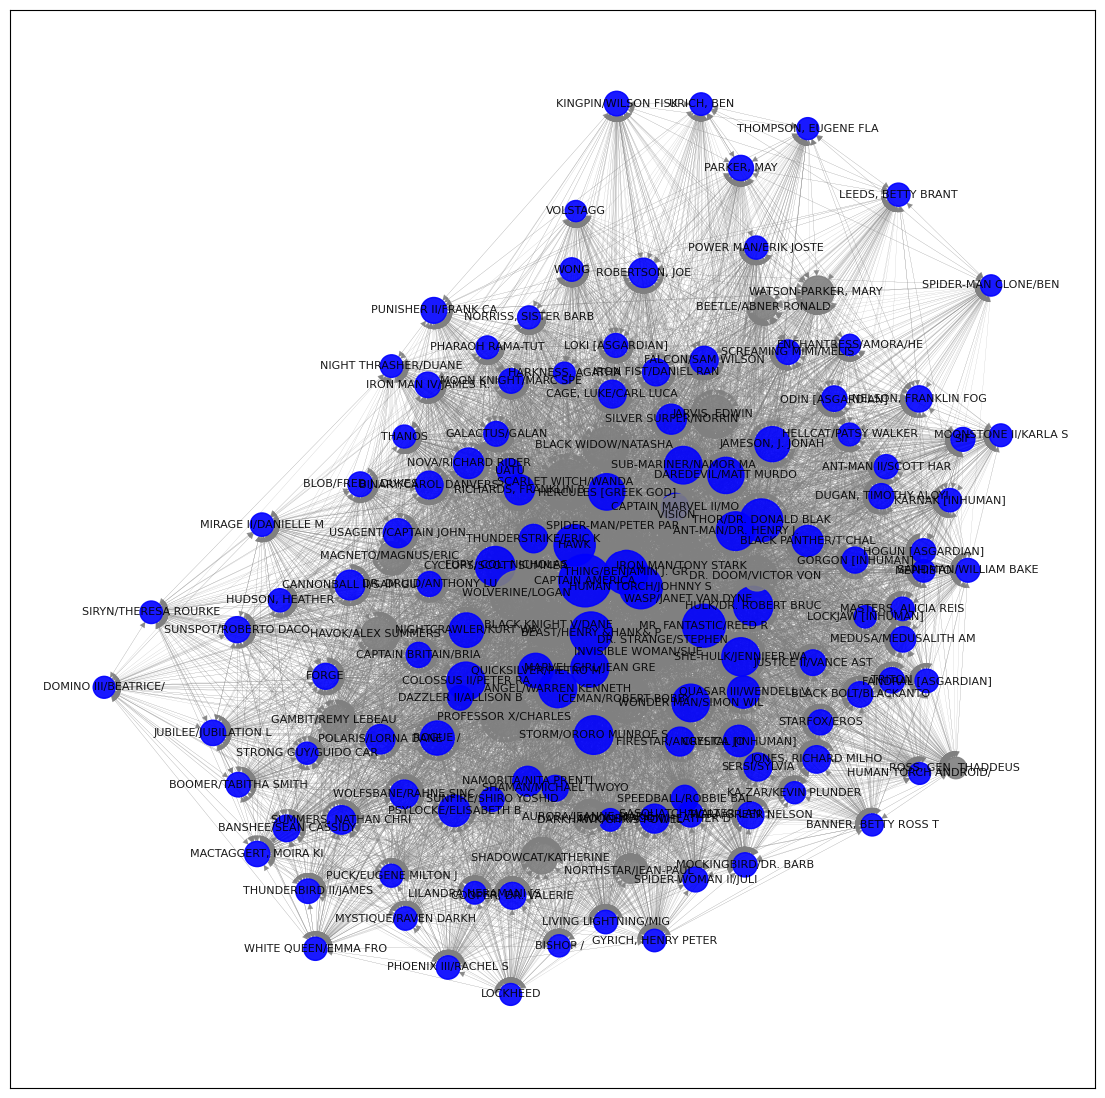

In [21]:
# plot the grapth
print("The graph is:")
plt.figure(3,figsize=(14,14))
nx.draw_networkx(g, with_labels=True, node_size=nodes_size, node_color=node_colors, font_size=8,edge_color='gray', width=0.1, alpha=0.9)